**Classifying Muffins and Cupcakes with SVM**

#### Step-1 import packages

In [1]:
# Packages for Analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for Visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

# Inline charts Allow, charts appears in the notebook
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
import pickle

In [3]:
# Read in muffin and cupake ingredient data
recipes = pd.read_csv("C:/Users/Ravi kumar/Documents/ipython/Learn/muffin-cupcake-master/recipes_muffins_cupcakes.csv")

In [4]:
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [5]:
recipes.describe()

,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0
mean,43.900000,18.550000,17.100000,11.000000,7.200000,1.300000,0.500000,0.0
std,7.018022,6.801509,7.538672,4.801316,3.019237,0.732695,0.512989,0.0
min,34.000000,0.000000,3.000000,5.000000,4.000000,0.000000,0.000000,0.0
25%,38.000000,15.000000,12.000000,7.000000,5.000000,1.000000,0.000000,0.0
50%,43.500000,17.000000,17.000000,10.000000,6.000000,1.000000,0.500000,0.0
75%,50.000000,24.250000,23.000000,14.250000,9.000000,2.000000,1.000000,0.0
max,55.000000,28.000000,31.000000,20.000000,14.000000,3.000000,1.000000,0.0


In [6]:
list(recipes)

['Type',
 'Flour',
 'Milk',
 'Sugar',
 'Butter',
 'Egg',
 'Baking Powder',
 'Vanilla',
 'Salt']

In [7]:
recipes.Type.unique()

array(['Muffin', 'Cupcake'], dtype=object)

In [8]:
## Specify inputs for the model
ingredients = recipes[['Flour', 'Sugar']].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [9]:
type_label = np.where(recipes.Type=='Muffin', 0, 1)

In [10]:
recipes['label'] = recipes.Type.apply(lambda x : 0 if str(x) == 'Muffin' else 1)

In [11]:
recipes.head(5)

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,label
0,Muffin,55,28,3,7,5,2,0,0,0
1,Muffin,47,24,12,6,9,1,0,0,0
2,Muffin,47,23,18,6,4,1,0,0,0
3,Muffin,45,11,17,17,8,1,0,0,0
4,Muffin,50,25,12,6,5,2,1,0,0


In [12]:
# Featre names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

['Flour',
 'Milk',
 'Sugar',
 'Butter',
 'Egg',
 'Baking Powder',
 'Vanilla',
 'Salt',
 'label']

#### Step 4: Fit the Model

In [14]:
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Visualize Results

In [18]:
# Get the seperate Hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30,60)
yy = a * xx - (model.intercept_[0]) / w[1]

In [20]:
# plot the parallels to the seperating hyperplane that pass through the
# support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

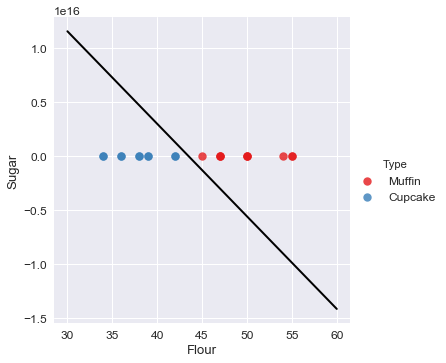

In [21]:
# Plot the Hyperplane
sns.lmplot('Flour', 'Sugar', data = recipes, hue = 'Type', palette = 'Set1'
          ,fit_reg = False, scatter_kws = {"s":70})
plt.plot(xx, yy, linewidth = 2, color = 'black')

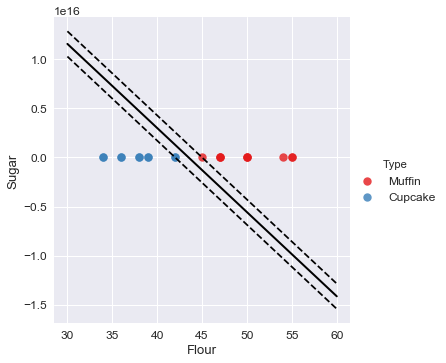

In [27]:
# look at the margins and the support vectors
sns.lmplot('Flour', 'Sugar', data = recipes, hue = 'Type', palette = 'Set1',
          fit_reg = False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
# plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1]),s = 80, facecolors = 'none');

#### Step 6: Predict New Case

In [30]:
# Create a function to guess when a recipe is a muffin or a cupacake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]])) ==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\re looking at a cupcake recipe!')

In [31]:
## Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50,20)

You're looking at a muffin recipe!


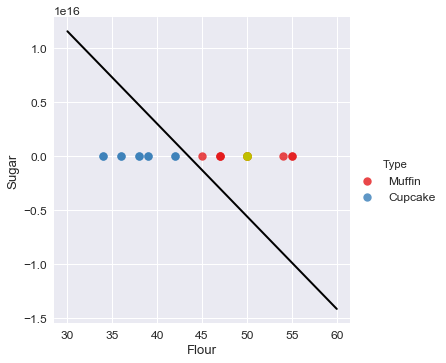

In [35]:
## Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data = recipes, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s":70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(50, 20, 'yo', markersize = '9')